Epoch 0 | Loss: 0.74826
Epoch 100 | Loss: 0.01458
Epoch 200 | Loss: 0.01258
Epoch 300 | Loss: 0.01167
Epoch 400 | Loss: 0.01081
Epoch 500 | Loss: 0.01001
Epoch 600 | Loss: 0.00927
Epoch 700 | Loss: 0.00858
Epoch 800 | Loss: 0.00796
Epoch 900 | Loss: 0.00738

🎯 Final Weights and Biases:
W1 (Input → Hidden):
[[ 0.04982872  0.0872162   0.06490292  0.17794304 -0.01893316 -0.0234137
   0.15594296  0.06358431]
 [-0.04679798  0.13519286 -0.04620131 -0.02589847  0.02832687 -0.19132802
  -0.17333973 -0.06553828]
 [-0.10081855  0.12809679 -0.09058185 -0.11649631  0.15316864 -0.02257763
   0.00437425 -0.15334824]
 [-0.05360753  0.11314751 -0.11487418  0.06339582 -0.05603741 -0.02894169
  -0.06264999  0.17202903]
 [-0.00076154 -0.01008115  0.0824258  -0.09617928  0.02346781 -0.19596701
  -0.13460707  0.00817039]
 [ 0.07400941  0.12156973 -0.01138701 -0.0026532  -0.14696644 -0.07198442
  -0.04889636  0.09217253]
 [ 0.03524722 -0.06665347  0.03252744 -0.0086577  -0.06757379  0.06158727
   0.10054556

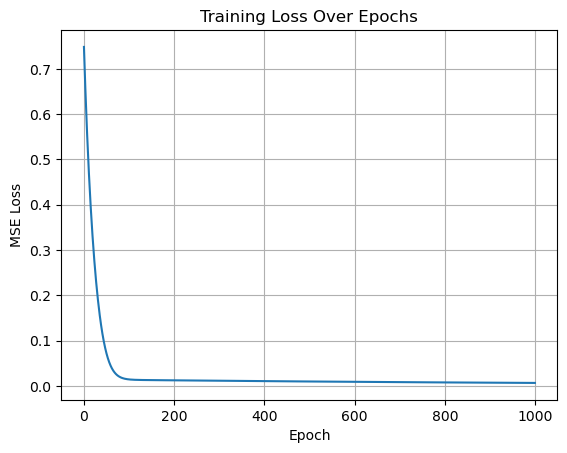

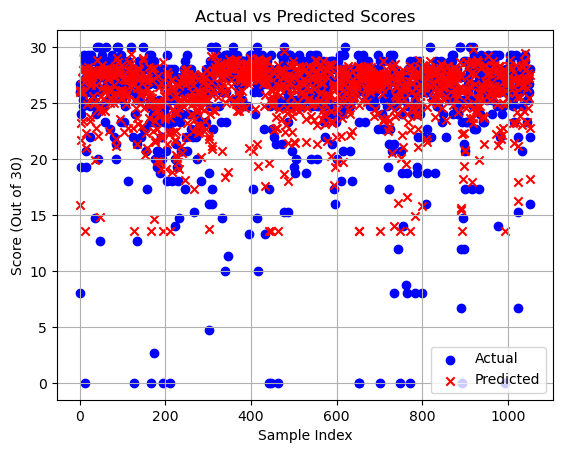


📌 Sample Predictions:
Sample 1 → Actual: 8.00, Predicted: 15.92
Sample 2 → Actual: 26.70, Predicted: 25.94
Sample 3 → Actual: 26.00, Predicted: 26.17
Sample 4 → Actual: 19.30, Predicted: 21.65
Sample 5 → Actual: 24.00, Predicted: 23.24


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('marks_final.csv')

for col in marks_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)


X = df[marks_cols].values          
Y = df["Out of 30"].values.reshape(-1, 1)

X = X / 5.0
Y = Y / 30.0

np.random.seed(42)
input_size = X.shape[1]     
hidden_size = 8             
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

learning_rate = 0.01
epochs = 1000
loss_history = []

for epoch in range(epochs):

    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    Y_pred = Z2

    loss = mse_loss(Y, Y_pred)
    loss_history.append(loss)

    dZ2 = 2 * (Y_pred - Y) / Y.shape[0]
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1                                     n   
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f}")


print("\n🎯 Final Weights and Biases:")
print("W1 (Input → Hidden):")
print(W1)
print("\nb1 (Hidden Layer Bias):")
print(b1)
print("\nW2 (Hidden → Output):")
print(W2)
print("\nb2 (Output Layer Bias):")
print(b2)

# 📈 Step 5: Loss Visualization
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# 📊 Step 6: Prediction vs Actual
final_pred = Y_pred * 30
actual = Y * 30

plt.scatter(range(len(actual)), actual, label='Actual', color='blue')
plt.scatter(range(len(final_pred)), final_pred, label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Scores")
plt.xlabel("Sample Index")
plt.ylabel("Score (Out of 30)")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Sample Predictions
print("\n📌 Sample Predictions:")
for i in range(5):
    print(f"Sample {i+1} → Actual: {actual[i][0]:.2f}, Predicted: {final_pred[i][0]:.2f}")
